In [2]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

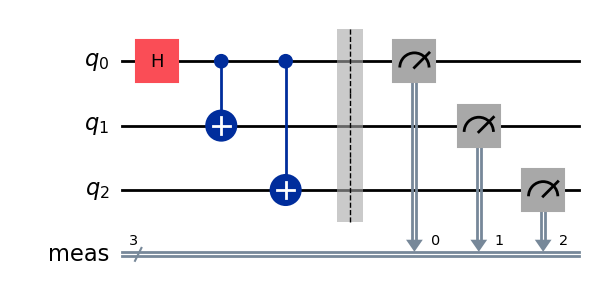

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Get a fake backend from the fake provider
backend = FakeManilaV2()
 
# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(0,2)
circuit.measure_all()
circuit.draw('mpl', style="iqp")


In [4]:
from qiskit_addon_cutting import (
    cut_gates,
    partition_problem,
    generate_cutting_experiments,
    reconstruct_expectation_values,
)
from qiskit.circuit.instruction import *
circuit.remove_final_measurements()
for instr in circuit.data:
    if (instr.name == "qpd_1q"):
        print(instr)
        

partitioned_problem = partition_problem(
    circuit=circuit, partition_labels= "AAB", observables= None
)
subcircuits = partitioned_problem.subcircuits
subcircuits['A'].draw("mpl")
circuitA = subcircuits['A']
for instr in circuitA.data:
    print(instr.operation)
circuitA.data = [hasverify for hasverify in circuitA.data if hasverify.operation.name != 'qpd_1q']
print(circuitA.data)
print(type(circuitA))
print(type(circuit))
circuitA.draw("mpl")
circuitA.measure_all()


Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
Instruction(name='qpd_1q', num_qubits=1, num_clbits=0, params=[])
[CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), clbits=())]
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>


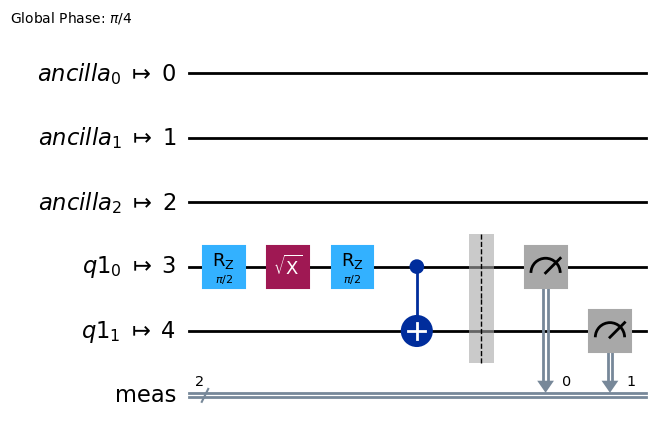

In [5]:
# Transpile the ideal circuit to a circuit that can be
# directly executed by the backend
transpiled_circuit = transpile(circuitA, backend)
transpiled_circuit.draw('mpl', style="iqp")

In [6]:
# Run the transpiled circuit using the simulated fake backend
sampler = SamplerV2(backend)
job = sampler.run([transpiled_circuit])
pub_result = job.result()[0]
counts1 = pub_result.data.meas.get_counts()
plot_histogram(counts1)
print(counts1)

{'00': 507, '11': 487, '10': 18, '01': 12}


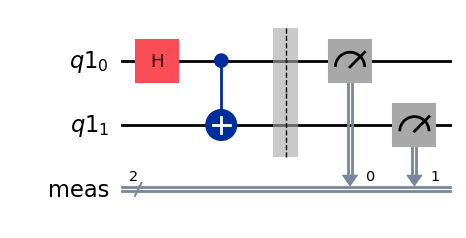

In [7]:
simulator = AerSimulator()
transpiled_circuit_ideal = transpile(circuitA, simulator)
transpiled_circuit_ideal.draw('mpl', style="iqp")

{'00': 503, '11': 521}


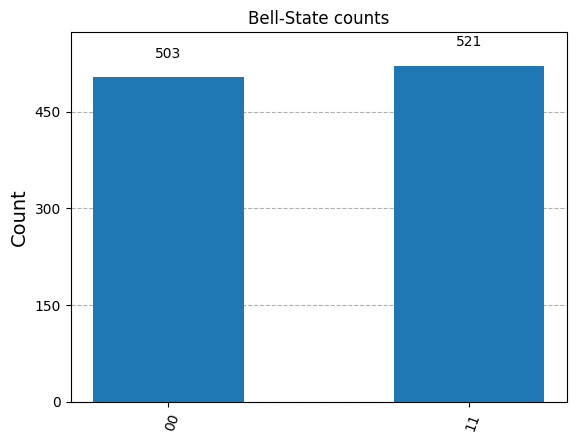

In [8]:
# Run and get counts
result = simulator.run(circuitA).result()
counts2 = result.get_counts(circuitA)
print(counts2)
plot_histogram(counts2, title='Bell-State counts')

In [9]:
import qiskit
from qiskit_aer.primitives import SamplerV2

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)

Counts(ideal): {'111': 68, '000': 60}


Probabilities: {'00': 0.4951171875, '11': 0.4755859375, '10': 0.017578125, '01': 0.01171875}
Density Matrix:
 DensityMatrix([[0.49511719+0.j, 0.        +0.j, 0.        +0.j,
                0.        +0.j],
               [0.        +0.j, 0.01171875+0.j, 0.        +0.j,
                0.        +0.j],
               [0.        +0.j, 0.        +0.j, 0.01757812+0.j,
                0.        +0.j],
               [0.        +0.j, 0.        +0.j, 0.        +0.j,
                0.47558594+0.j]],
              dims=(2, 2))


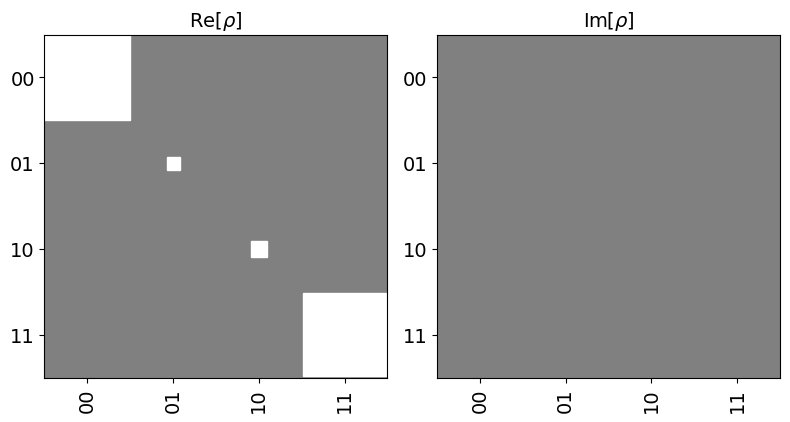

In [17]:
from qiskit.quantum_info import DensityMatrix
import numpy as np
import matplotlib.pyplot as plt

# Kết quả đếm (counts)
counts = {'00': 507, '11': 487, '10': 18, '01': 12}

# Tổng số lần đo
total_counts = sum(counts.values())

# Tính toán xác suất cho mỗi trạng thái
probabilities = {key: value / total_counts for key, value in counts.items()}
print("Probabilities:", probabilities)

# Khởi tạo ma trận mật độ (density matrix) từ các xác suất
dim = 4  # Vì hệ thống có 2 qubit, nên ma trận mật độ sẽ có kích thước 4x4

# Khởi tạo ma trận mật độ với kích thước 4x4 (2 qubit)
rho_matrix = np.zeros((dim, dim), dtype=complex)

# Danh sách các trạng thái cơ bản (cho 2 qubit)
basis_states = ['00', '01', '10', '11']

# Xây dựng ma trận mật độ
for state, prob in probabilities.items():
    # Tạo vector trạng thái cơ bản
    state_idx = basis_states.index(state)
    # Cập nhật ma trận mật độ
    rho_matrix[state_idx, state_idx] = prob

# Tạo đối tượng DensityMatrix từ ma trận mật độ
rho = DensityMatrix(rho_matrix)
print("Density Matrix:\n", rho)

# Trực quan hóa ma trận mật độ bằng Hinton plot
rho.draw(output='hinton')



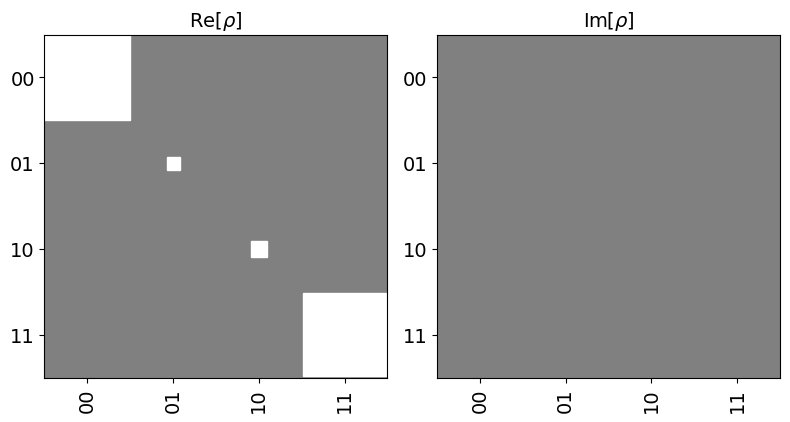

In [24]:
import numpy as np
from qiskit.quantum_info import DensityMatrix

# Kết quả đếm của hai hệ thống
counts_ideal = {'00': 507, '11': 487, '10': 18, '01': 12}
counts_real = {'00': 503, '11': 521}

# Tổng số lần đo cho mỗi hệ thống
total_counts_ideal = sum(counts_ideal.values())
total_counts_real = sum(counts_real.values())

# Tính toán xác suất cho mỗi trạng thái
probabilities_ideal = {key: value / total_counts_ideal for key, value in counts_ideal.items()}
probabilities_real = {key: value / total_counts_real for key, value in counts_real.items()}

# Khởi tạo ma trận mật độ cho hệ lý tưởng (rho_ideal)
rho_matrix_ideal = np.zeros((4, 4), dtype=complex)
basis_states = ['00', '01', '10', '11']

# Xây dựng ma trận mật độ từ xác suất cho hệ lý tưởng
for state, prob in probabilities_ideal.items():
    state_idx = basis_states.index(state)
    rho_matrix_ideal[state_idx, state_idx] = prob

# Tạo đối tượng DensityMatrix từ ma trận mật độ lý tưởng
rho_ideal = DensityMatrix(rho_matrix_ideal)

# Khởi tạo ma trận mật độ cho hệ thực tế (rho_real)
rho_matrix_real = np.zeros((4, 4), dtype=complex)

# Xây dựng ma trận mật độ từ xác suất cho hệ thực tế
for state, prob in probabilities_real.items():
    state_idx = basis_states.index(state)
    rho_matrix_real[state_idx, state_idx] = prob

# Tạo đối tượng DensityMatrix từ ma trận mật độ thực tế
rho_real = DensityMatrix(rho_matrix_real)

# In ra ma trận mật độ lý tưởng và thực tế
# rho_real.draw(output='hinton')
rho_ideal.draw(output='hinton')

In [25]:
from qiskit.quantum_info import DensityMatrix, state_fidelity
import numpy as np


# Tính toán Fidelity giữa ma trận mật độ ideal và real
fidelity_value = state_fidelity(rho_ideal, rho_real)

print("Fidelity between ideal and real density matrices:", fidelity_value)


Fidelity between ideal and real density matrices: 0.9703582328353142
